# Hudson Arney - Lab 3
## CSC 5601 001 - Theory of Machine Learning
### 5 February 2024

### Intro:
In this lab I used a few flower datasets to try and categorize them as certain flower types using a decision boundary based on the flowers specific features. I tested different decision boundary equations to see which was best at breaking apart the two different classifications of flowers. I tested different features, seeing which one could be the best indicator. Lastly I learned the importance of using validation and testing data for a model and making sure that data is sligthly different than the training data to it gives the model the best chance to learn accurately and reliably. 

# Reflection Questions

## Problem 1:
Just by looking at your plot, which of the three decision boundaries does the best job of separating the two classes of points? 

- Decision Boundary 2 (red, sepal length and width): $ x_2 = 0.75x_1 - 0.9 $

Which of the three decision boundaries gave the more accurate predictions?

- Decision Boundary 2: $ x_2 = 0.75x_1 - 0.9 $

How does the accuracy metric seem to relate to the ability of the decision boundary to separate the classes?

- If the decision boundary "looks" like it does a good job at being a separator of labels (putting a line in the middle of the two options in this case) it will be the more accurate predictor. 

## Problem 2:
For which pair of features are the classes more easily separated?

- The Petal Length & Width

Just by looking at your plots, for which pair of features does the decision boundary do a better job of separating the classes?

- The Petal Length & Width

Which decision boundary gives the most accurate predictions?

- Decision Boundary 2 (black, petal length and width): $ x_2 = -0.7x_1 + 5 $

How does the choice of features seem to impact the ability to make accurate predictions?

- If you have a well defined feature, as in something that can easily be distinguised for each class, the feature can be a good indictor for making more accurate predictions. In this case sepal length & width was not a great predictor because the features "overlapped" for the versicolor and virginica flowers. The petal features were more easily distinguised clusters. 

## Problem 3:
Compare the accuracies you calculated from the training and testing data sets. Predictions for which data set were evaluated as more accurate? Which accuracy score do you think is a more realistic representation of the performance of the model?

- The training data was evaluated as more accurate than the testing. I think the testing is a more realistic representation of the performance of the model as real world data is more likely to be imperfect and not ideally match up with a decision boundary. 

Look at the scatter plot of the validation data points. Will the model make errors in predicting the labels? Why?

- Although both clusters are majoritly divided by the decision boundary, there are a good amount of orange (not setosa) points on the "wrong" side of the decision boundary. This should lead to a few errors in predictions. 

Look at the scatter plots of the training and testing data points. Which data set is more representative of the validation data set? Which data set will demonstrate errors similar to the validation set?

- The testing data set is more similar to the validation set. Both contain a smaller number of data points, as well as a less accurate decision boundary in comparison to the training set. The validation and testing should produce similar errors and accuracies. 

Compare the accuracies you calculated from the training and testing data sets to the validation data set. Which accuracy calculation is more representative of the accuracy for the validation data set?

- The accuracy of the validation set is more similar to the testing set. Logically I believe this makes sense for the same reasoning as the last question. 

Explain why training and evaluating a model on the same data set can be deceptive.

- By giving the model the same testing data as the training it isn't really learning but rather memorizing. This may lead to a very high accuracy, but if the model were given an external data it is more likely to struggle. 

Explain how dividing data into training and testing sets with no repeated points resolves some of the problems associated with training and evaluating a model on the same data set.

- It gives the model a better chance to learn and experience data that has slightly different attributes than the training set. This will be extremely helpful if you start feeding the model new data it has never seen before because it already went through that process with the testing data.

Name 3 potential ramifications for publishing a model that was trained and characterized using the same data set. 

- **Overfitting:** Publishing a model trained and characterized using the same dataset risks overfitting, potentially capturing noise or specific patterns that aren't generalizable, leading to a misleading interpretation of its performance.

- **Lack of Generalization:** The model may perform well on the training data but inadequately on new, unseen data from different distributions or conditions, undermining its practical utility.

- **Questionable Reliability:** The absence of validation raises doubts about the model's reliability, as its performance hasn't been assessed across different data, potentially eroding trust in its findings.

In [1]:
import numpy as np
from scipy import stats
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from decision_boundaries import linear_decision_boundary_classifier

# 1. Decision boundaries and Evaluation of Model Predictions with Metrics
## a. Load the "setosa_data.csv" using the Pandas read_csv() function.

In [2]:
setosa_df = pd.read_csv("setosa_data.csv")

## b. Display the first few rows of the DataFrame using the head() function.

In [3]:
setosa_df.head()

,label,sepal_length (cm),sepal_width (cm)
0,not setosa,5.1,3.5
1,not setosa,4.9,3.0
2,not setosa,4.7,3.2
3,not setosa,4.6,3.1
4,not setosa,5.0,3.6


In [4]:
label_encoder = LabelEncoder()
true_labels = setosa_df["label"].values # Initially Strings
dec_bound_vec = np.array([0.75, -1.0, -0.9])
features = setosa_df[["sepal_length (cm)", "sepal_width (cm)"]].values
true_labels = label_encoder.fit_transform(true_labels) # Encode them to integers
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features) # Initially Integers
pred_labels = label_encoder.inverse_transform(pred_labels.astype(int)) # To Strings
true_labels = label_encoder.inverse_transform(true_labels) # Back to strings

## Create a scatter plot of the data set points with the sepal length on the horizontal axis and the sepal width on the vertical axis. Color each point by its class (orange for setosa, blue for not setosa).

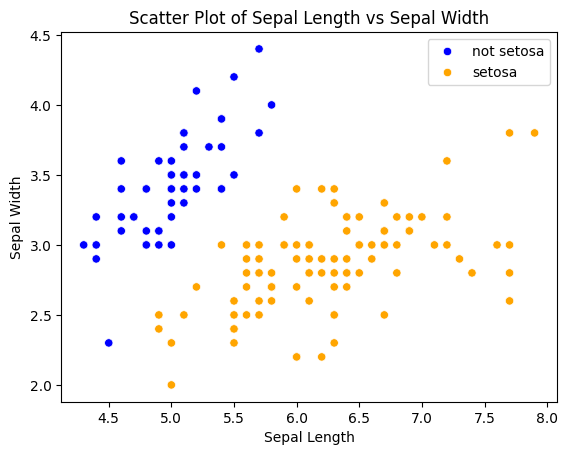

In [5]:
sns.scatterplot(data=setosa_df, x='sepal_length (cm)', y='sepal_width (cm)', hue=setosa_df["label"], palette={'setosa': 'orange', 'not setosa': 'blue'})
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend()
plt.show()

In [6]:
x_values = np.linspace(min(setosa_df['sepal_length (cm)']), max(setosa_df['sepal_length (cm)']), 100)
y_boundary1 = 2 * x_values - 8
y_boundary2 = 0.75 * x_values - 0.9
y_boundary3 = -0.2 * x_values + 12

### d. Plot in the specified color and label the decision boundaries defined by the following equations

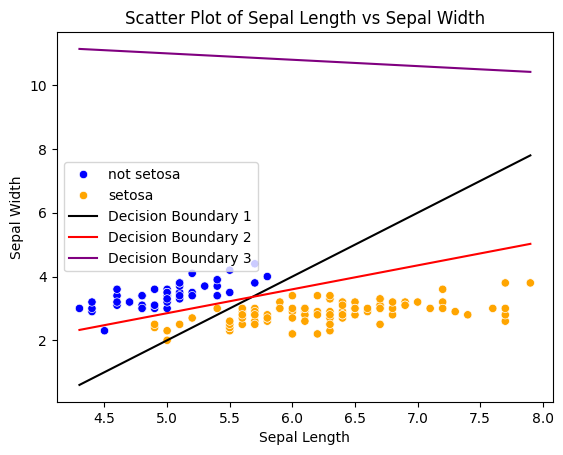

In [7]:
sns.scatterplot(data=setosa_df, x='sepal_length (cm)', y='sepal_width (cm)', hue=setosa_df["label"], palette={'setosa': 'orange', 'not setosa': 'blue'})

plt.plot(x_values, y_boundary1, color='black', label='Decision Boundary 1')
plt.plot(x_values, y_boundary2, color='red', label='Decision Boundary 2')
plt.plot(x_values, y_boundary3, color='purple', label='Decision Boundary 3')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend()
plt.show()

## e. Standard Form for Decision Boundaries
### Decision Boundary 1:
- $ x_2 = 2x_1 - 8 $
- $ x_2 - 2x_1 + 8 = 0 $
### Decision Boundary 2:
- $ x_2 = 0.75x_1 - 0.9 $
- $ x_2 - 0.75x_1 + 0.9 = 0 $
### Decision Boundary 3:
- $ x_2 = -0.2x_1 + 12 $
- $ x_2 + 0.2x_1 - 12 = 0 $

### f. Import the linear_decision_boundary_classifier() function from the provided decision_boundaries.py file. Call the function for each decision boundary like so:

In [8]:
#                            x_1   x_2   w_0
dec_bound_vec_1 = np.array([-2, 1.0, 8])
dec_bound_vec_2 = np.array([-0.75, 1.0, 0.9])
dec_bound_vec_3 = np.array([0.2, 1.0, -12])

features = setosa_df[["sepal_length (cm)", "sepal_width (cm)"]].values

label_encoder_2 = LabelEncoder()

true_labels = setosa_df["label"].values
true_labels = label_encoder_2.fit_transform(true_labels)

pred_labels_1 = linear_decision_boundary_classifier(dec_bound_vec_1, features, true_labels, features)
pred_labels_2 = linear_decision_boundary_classifier(dec_bound_vec_2, features, true_labels, features)
pred_labels_3 = linear_decision_boundary_classifier(dec_bound_vec_3, features, true_labels, features)

#print(pred_labels_1)
#print(pred_labels_2)
#print(pred_labels_3)

pred_labels_1 = label_encoder_2.inverse_transform(pred_labels_1.astype(int)) # To Strings
pred_labels_2 = label_encoder_2.inverse_transform(pred_labels_2.astype(int)) # To Strings
pred_labels_3 = label_encoder_2.inverse_transform(pred_labels_3.astype(int)) # To Strings

true_labels = label_encoder_2.inverse_transform(true_labels) # Back to strings

## g. Use the scikit-learn sklearn.metrics.accuracy_score() function to calculate and print the accuracy of the predictions using each decision boundary using the true and predicted labels.

In [9]:
accuracy_1 = accuracy_score(true_labels, pred_labels_1)
accuracy_2 = accuracy_score(true_labels, pred_labels_2)
accuracy_3 = accuracy_score(true_labels, pred_labels_3)

print("Accuracy for Decision Boundary 1 (x2 = 2x1 - 8):", accuracy_1)
print("Accuracy for Decision Boundary 2 (x2 = 0.75x1 - 0.9):", accuracy_2)
print("Accuracy for Decision Boundary 3 (x2 = -0.2x1 + 12):", accuracy_3)

Accuracy for Decision Boundary 1 (x2 = 2x1 - 8): 0.96
Accuracy for Decision Boundary 2 (x2 = 0.75x1 - 0.9): 0.9933333333333333
Accuracy for Decision Boundary 3 (x2 = -0.2x1 + 12): 0.6666666666666666


# 2. Predictive Power of Features
## a. Load the "versicolor_virginica_data.csv" using the Pandas read_csv() function.

In [10]:
virginica_df = pd.read_csv("versicolor_virginica_data.csv")

## b. Display the first few rows of the DataFrame using the head() function.

In [11]:
virginica_df.head()

,label,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm)
0,versicolor,7.0,3.2,4.7,1.4
1,versicolor,6.4,3.2,4.5,1.5
2,versicolor,6.9,3.1,4.9,1.5
3,versicolor,5.5,2.3,4.0,1.3
4,versicolor,6.5,2.8,4.6,1.5


## c. Create a scatter plot of the data set points with the sepal length on the horizontal axis and the sepal width on the vertical axis. Color each point by its class (orange for versicolor, blue for virginica)

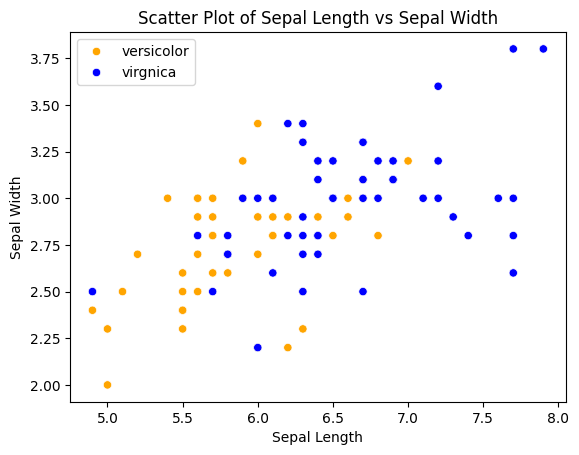

In [12]:
sns.scatterplot(data=virginica_df, x='sepal_length (cm)', y='sepal_width (cm)', hue=virginica_df["label"], palette={'versicolor': 'orange', 'virgnica': 'blue'})
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend()
plt.show()

## d. Create a second scatter plot of the data set points with the petal length on the horizontal axis and the petal width on the vertical axis. Color each point by its class (orange for versicolor, blue for virginica)

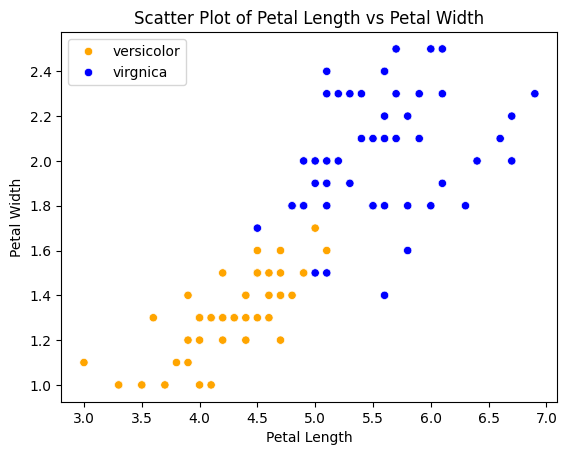

In [13]:
sns.scatterplot(data=virginica_df, x='petal_length (cm)', y='petal_width (cm)', hue=virginica_df["label"], palette={'versicolor': 'orange', 'virgnica': 'blue'})
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.legend()
plt.show()

## e. For each pair of features, and plot and label the decision boundaries defined by the following equations

Decision Boundary 1 (black, sepal length and width): - $ x_2 = -0.7x_1 + 7 $

Decision Boundary 2 (black, petal length and width): - $ x_2 = -0.7x_1 + 5 $

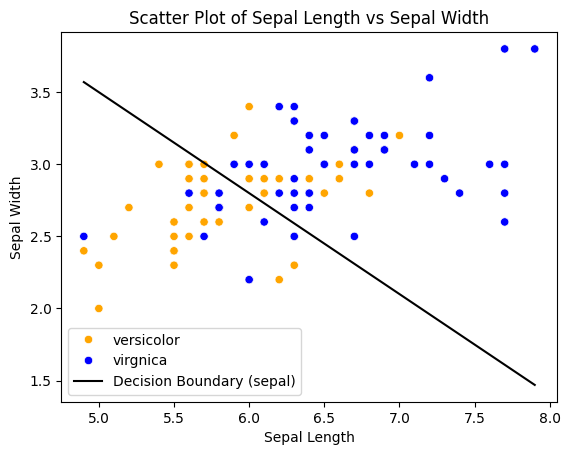

In [14]:
sns.scatterplot(data=virginica_df, x='sepal_length (cm)', y='sepal_width (cm)', hue=virginica_df["label"], palette={'versicolor': 'orange', 'virgnica': 'blue'})
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title('Scatter Plot of Sepal Length vs Sepal Width')

x_values = np.linspace(min(virginica_df["sepal_length (cm)"]), max(virginica_df["sepal_length (cm)"]))
y_values = -0.7 * x_values + 7
plt.plot(x_values, y_values, color='black', label='Decision Boundary (sepal)')

plt.legend()
plt.show()

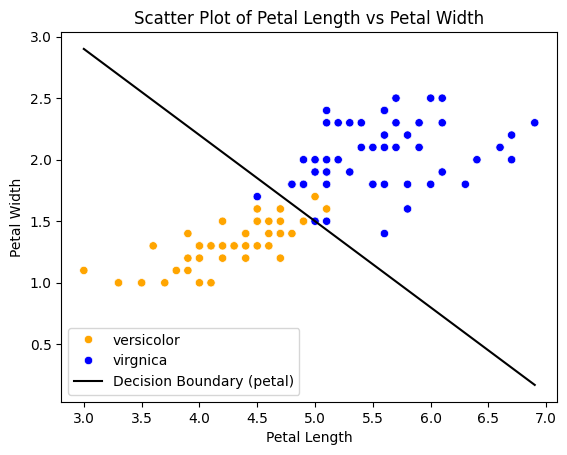

In [15]:
sns.scatterplot(data=virginica_df, x='petal_length (cm)', y='petal_width (cm)', hue=virginica_df["label"], palette={'versicolor': 'orange', 'virgnica': 'blue'})
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title('Scatter Plot of Petal Length vs Petal Width')

x_values = np.linspace(min(virginica_df["petal_length (cm)"]), max(virginica_df["petal_length (cm)"]))
y_values = -0.7 * x_values + 5
plt.plot(x_values, y_values, color='black', label='Decision Boundary (petal)')

plt.legend()
plt.show()

## f. Rewrite each decision boundary equation in a modified standard form (keep fractions):

### Decision Boundary 1:
- $ x_2 = -0.7x_1 + 7 $
- $ x_2 + 0.7x_1 - 7 = 0 $

### Decision Boundary 2:
- $ x_2 = -0.7x_1 + 5 $
- $ x_2 + 0.7x_1 - 5 = 0 $

## g. Import the linear_decision_boundary_classifier() function from the provided decision_boundaries.py file. Call the function with each pair of features and its associated decision boundary like so:

In [16]:
#                            x_1   x_2   w_0
dec_bound_vec_sepal = np.array([0.7, 1.0, -7])
dec_bound_vec_petal = np.array([0.7, 1.0, -5])

features_sepal = virginica_df[["sepal_length (cm)", "sepal_width (cm)"]].values
features_petal = virginica_df[["petal_length (cm)", "petal_width (cm)"]].values

label_enc = LabelEncoder()

true_labels_sepal = virginica_df["label"].values
true_labels_sepal = label_enc.fit_transform(true_labels_sepal)
true_labels_petal = virginica_df["label"].values
true_labels_petal = label_enc.fit_transform(true_labels_petal)

pred_labels_sepal = linear_decision_boundary_classifier(dec_bound_vec_sepal, features_sepal, true_labels_sepal, features_sepal)
pred_labels_petal = linear_decision_boundary_classifier(dec_bound_vec_petal, features_petal, true_labels_petal, features_petal)

pred_labels_sepal = label_enc.inverse_transform(pred_labels_sepal.astype(int)) # To Strings
pred_labels_petal = label_enc.inverse_transform(pred_labels_petal.astype(int)) # To Strings

true_labels_sepal = label_enc.inverse_transform(true_labels_sepal) # Back to strings
true_labels_petal = label_enc.inverse_transform(true_labels_petal) # Back to strings

## h. Use the scikit-learn sklearn.metrics.accuracy_score() function to calculate and print the accuracy of the predictions using each decision boundary using the true and predicted labels.

In [17]:
accuracy_sepal = accuracy_score(true_labels_sepal, pred_labels_sepal)
accuracy_petal = accuracy_score(true_labels_petal, pred_labels_petal)

print("Accuracy for Decision Boundary 1 (x2 = -0.7x1 + 7):", accuracy_sepal)
print("Accuracy for Decision Boundary 2 (x2 = -0.7x1 + 5):", accuracy_petal)

Accuracy for Decision Boundary 1 (x2 = -0.7x1 + 7): 0.7
Accuracy for Decision Boundary 2 (x2 = -0.7x1 + 5): 0.95


# 3. Experimental Setup with Train-Test Splitting

## a. Create scatter plots of the validation, training, and testing data points (3 separate plots). Put the sepal length on the horizontal axis, and the sepal width on the vertical axis. Color each point by its class (orange for setosa, blue for not setosa). Plot the with the following decision boundary on each plot.

- Decision Boundary (black): $ x_2 = 2x_1 - 8 $

In [18]:
def decision_boundary(x):
    return 2 * x - 8

In [19]:
def plot_data_with_boundary(df, title):
    sepal_length = df["sepal_length (cm)"]
    sepal_width = df["sepal_width (cm)"]
    classes = df["label"]

    plt.scatter(sepal_length[classes == 'setosa'], sepal_width[classes == 'setosa'], c='orange', label='Setosa')
    plt.scatter(sepal_length[classes != 'setosa'], sepal_width[classes != 'setosa'], c='blue', label='Not Setosa')

    x_values = np.linspace(min(sepal_length), max(sepal_length), 100)
    y_values = decision_boundary(x_values)
    plt.plot(x_values, y_values, c='black', label='Decision Boundary')
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(title)
    plt.legend()

In [20]:
setosa_training = pd.read_csv('setosa_data.csv')
setosa_testing = pd.read_csv('setosa_testing.csv')
setosa_validation = pd.read_csv('setosa_validation.csv')

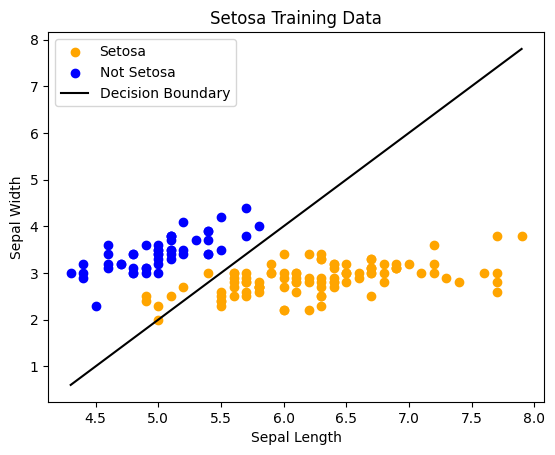

In [21]:
plot_data_with_boundary(setosa_training, "Setosa Training Data")
plt.show()

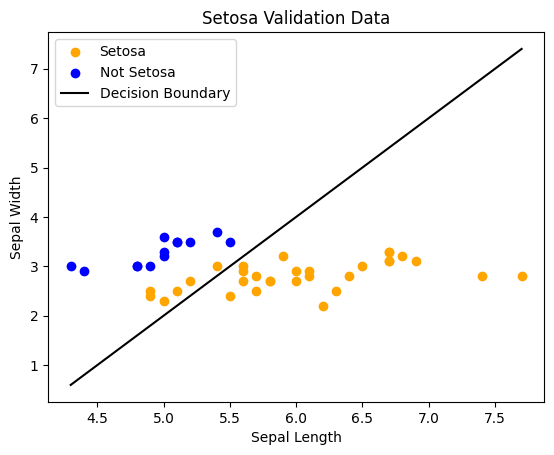

In [22]:
plot_data_with_boundary(setosa_validation, 'Setosa Validation Data')
plt.show()

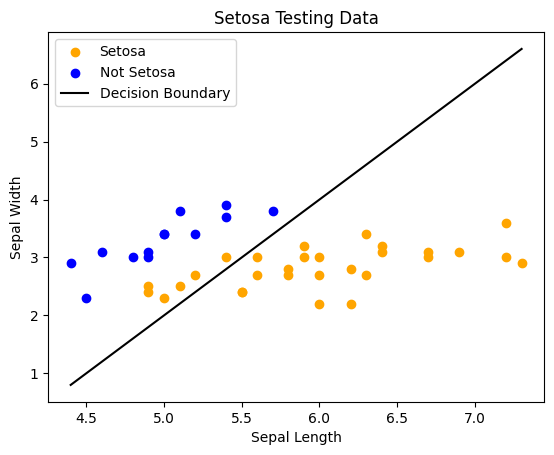

In [23]:
plot_data_with_boundary(setosa_testing, 'Setosa Testing Data')
plt.show()

## b. Evaluate the predictions for the given decision boundary using the pairs of data sets in the table below. Use the linear_decision_boundary_classifier() function to predict labels for the following data sets and the accuracy_score() function to evaluate the accuracies of the predictions.

In [24]:
dec_bound_exprmnt3 = np.array([-2, 1.0, 8])

features_train = setosa_training[["sepal_length (cm)", "sepal_width (cm)"]].values

label_encoder_4 = LabelEncoder()

true_labels_train = setosa_training["label"].values
true_labels_train = label_encoder_4.fit_transform(true_labels_train)

pred_labels_train = linear_decision_boundary_classifier(dec_bound_exprmnt3, features_train, true_labels_train, features_train)
pred_labels_train = label_encoder_4.inverse_transform(pred_labels_train.astype(int)) # To Strings

true_labels_train = label_encoder_4.inverse_transform(true_labels_train) # Back to strings

accuracy_train = accuracy_score(true_labels_train, pred_labels_train)
print("Accuracy for Training Data on Decision Boundary (x2 = 2x1 - 8):", accuracy_train)

Accuracy for Training Data on Decision Boundary (x2 = 2x1 - 8): 0.96


In [25]:
features_validation = setosa_validation[["sepal_length (cm)", "sepal_width (cm)"]].values

label_encoder_5 = LabelEncoder()

true_labels_validation = setosa_validation["label"].values
true_labels_validation = label_encoder_5.fit_transform(true_labels_validation)

pred_labels_validation = linear_decision_boundary_classifier(dec_bound_exprmnt3, features_validation, true_labels_validation, features_validation)
pred_labels_validation = label_encoder_5.inverse_transform(pred_labels_validation.astype(int)) # To Strings

true_labels_validation = label_encoder_5.inverse_transform(true_labels_validation) # Back to strings

accuracy_validation = accuracy_score(true_labels_validation, pred_labels_validation)
print("Accuracy for Validation Data on Decision Boundary (x2 = 2x1 - 8):", accuracy_validation)

Accuracy for Validation Data on Decision Boundary (x2 = 2x1 - 8): 0.8636363636363636


In [26]:
features_test = setosa_testing[["sepal_length (cm)", "sepal_width (cm)"]].values

label_encoder_6 = LabelEncoder()

true_labels_test = setosa_testing["label"].values
true_labels_test = label_encoder_6.fit_transform(true_labels_test)

pred_labels_test = linear_decision_boundary_classifier(dec_bound_exprmnt3, features_test, true_labels_test, features_test)
pred_labels_test = label_encoder_6.inverse_transform(pred_labels_test.astype(int)) # To Strings

true_labels_test = label_encoder_6.inverse_transform(true_labels_test) # Back to strings

accuracy_test = accuracy_score(true_labels_test, pred_labels_test)
print("Accuracy for Test Data on Decision Boundary (x2 = 2x1 - 8):", accuracy_test)

Accuracy for Test Data on Decision Boundary (x2 = 2x1 - 8): 0.8571428571428571
